In [64]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [65]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [66]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [67]:
from citipy import citipy

In [68]:
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

port alfred za
mataura pf
ushuaia ar
cape town za
mataura pf
gayeri bf
cidreira br
natal br
kapaa us
rikitea pf
rikitea pf
namatanai pg
khasan ru
lata sb
fort nelson ca
sofiysk ru
mikkeli fi
rikitea pf
lompoc us
coracora pe
jamestown sh
novokizhinginsk ru
guerrero negro mx
geraldton au
hasaki jp
hermanus za
necochea ar
canto do buriti br
havoysund no
college us
santa vitoria do palmar br
vardo no
pafos cy
cayenne gf
new norfolk au
mataura pf
new norfolk au
hermanus za
hobart au
saint george bm
kaitangata nz
qui nhon vn
qaanaaq gl
ushuaia ar
ushuaia ar
mys shmidta ru
illoqqortoormiut gl
butaritari ki
butaritari ki
the valley ai
jaciara br
camacha pt
hithadhoo mv
thompson ca
luderitz na
uzhur ru
rikitea pf
amderma ru
rikitea pf
sur om
guerrero negro mx
jamestown sh
ancud cl
beringovskiy ru
cockburn town tc
hasaki jp
hobart au
saint-philippe re
leningradskiy ru
vila velha br
lavrentiya ru
puerto ayora ec
bluff nz
high level ca
hiroshima jp
hovd mn
gataivai ws
punta arenas cl
butaritari ki

mandalgovi mn
busselton au
saint-philippe re
qaanaaq gl
cape town za
souillac mu
punta arenas cl
port elizabeth za
krasnoselkup ru
kununurra au
avarua ck
longyearbyen sj
upernavik gl
kaitangata nz
port alfred za
araouane ml
clinton us
rantoul us
ponta pora br
tasiilaq gl
zyryanka ru
naftah tn
jamestown sh
kumano jp
natal br
qaanaaq gl
ahipara nz
port alfred za
tsihombe mg
albany au
kendari id
salinopolis br
mys shmidta ru
atasu kz
khonuu ru
mataura pf
mount gambier au
ushuaia ar
busselton au
hasaki jp
lebu cl
port augusta au
hervey bay au
ushuaia ar
guerrero negro mx
greenfield us
hilo us
fort nelson ca
bilma ne
iqaluit ca
harlingen nl
punta arenas cl
rikitea pf
busselton au
albany au
hobart au
inhambane mz
lompoc us
tiksi ru
attawapiskat ca
bronnoysund no
narsaq gl
chimbote pe
cape town za
kyshtovka ru
mataura pf
hermanus za
rikitea pf
new norfolk au
raduzhnyy ru
hilo us
ahipara nz
eastbourne gb
aklavik ca
port alfred za
asyut eg
burgstadt de
gamba ga
east london za
upernavik gl
kahul

havre-saint-pierre ca
katsuura jp
port alfred za
tiksi ru
sakaiminato jp
naze jp
itabera br
qaanaaq gl
punta arenas cl
punta arenas cl
qaanaaq gl
vaini to
hobart au
chikoy ru
belushya guba ru
igrim ru
punta arenas cl
marsaxlokk mt
lagoa pt
san patricio mx
ushuaia ar
nelson bay au


In [69]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
print(len(cities))
print(cities)

605
['port alfred', 'mataura', 'ushuaia', 'cape town', 'gayeri', 'cidreira', 'natal', 'kapaa', 'rikitea', 'namatanai', 'khasan', 'lata', 'fort nelson', 'sofiysk', 'mikkeli', 'lompoc', 'coracora', 'jamestown', 'novokizhinginsk', 'guerrero negro', 'geraldton', 'hasaki', 'hermanus', 'necochea', 'canto do buriti', 'havoysund', 'college', 'santa vitoria do palmar', 'vardo', 'pafos', 'cayenne', 'new norfolk', 'hobart', 'saint george', 'kaitangata', 'qui nhon', 'qaanaaq', 'mys shmidta', 'illoqqortoormiut', 'butaritari', 'the valley', 'jaciara', 'camacha', 'hithadhoo', 'thompson', 'luderitz', 'uzhur', 'amderma', 'sur', 'ancud', 'beringovskiy', 'cockburn town', 'saint-philippe', 'leningradskiy', 'vila velha', 'lavrentiya', 'puerto ayora', 'bluff', 'high level', 'hiroshima', 'hovd', 'gataivai', 'punta arenas', 'kavaratti', 'poso', 'woodburn', 'yerbogachen', 'bay roberts', 'tiksi', 'ballina', 'hilo', 'san ramon', 'yellowknife', 'conceicao do araguaia', 'komsomolskiy', 'ransang', 'airai', 'east lo

In [70]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [71]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7004d3c74c8da565324a7fb3f793a4f6


In [72]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [73]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | gayeri
Processing Record 6 of Set 1 | cidreira
Processing Record 7 of Set 1 | natal
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | namatanai
Processing Record 11 of Set 1 | khasan
Processing Record 12 of Set 1 | lata
Processing Record 13 of Set 1 | fort nelson
Processing Record 14 of Set 1 | sofiysk
City not found. Skipping...
Processing Record 15 of Set 1 | mikkeli
Processing Record 16 of Set 1 | lompoc
Processing Record 17 of Set 1 | coracora
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | novokizhinginsk
Processing Record 20 of Set 1 | guerrero negro
Processing Record 21 of Set 1 | geraldton
Processing Record 22 of Set 1 | hasaki
Processing Record 2

Processing Record 42 of Set 4 | egra
Processing Record 43 of Set 4 | polis
Processing Record 44 of Set 4 | arrifes
Processing Record 45 of Set 4 | karratha
Processing Record 46 of Set 4 | muisne
Processing Record 47 of Set 4 | shelburne
Processing Record 48 of Set 4 | tungor
Processing Record 49 of Set 4 | san jeronimo
Processing Record 50 of Set 4 | arraial do cabo
Processing Record 1 of Set 5 | saskylakh
Processing Record 2 of Set 5 | san patricio
Processing Record 3 of Set 5 | dunedin
Processing Record 4 of Set 5 | wanning
Processing Record 5 of Set 5 | praia da vitoria
Processing Record 6 of Set 5 | arman
Processing Record 7 of Set 5 | barawe
City not found. Skipping...
Processing Record 8 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 9 of Set 5 | bilibino
Processing Record 10 of Set 5 | sorkjosen
Processing Record 11 of Set 5 | tautira
Processing Record 12 of Set 5 | puerto del rosario
Processing Record 13 of Set 5 | mount gambier
Processing Record 14 of S

Processing Record 26 of Set 8 | yar-sale
Processing Record 27 of Set 8 | zeya
Processing Record 28 of Set 8 | nemuro
Processing Record 29 of Set 8 | atbasar
Processing Record 30 of Set 8 | tres lagoas
Processing Record 31 of Set 8 | nioro
Processing Record 32 of Set 8 | dalby
Processing Record 33 of Set 8 | muskogee
Processing Record 34 of Set 8 | gazanjyk
Processing Record 35 of Set 8 | zuenoula
Processing Record 36 of Set 8 | walvis bay
Processing Record 37 of Set 8 | saint-paul
Processing Record 38 of Set 8 | fundao
Processing Record 39 of Set 8 | acapulco
Processing Record 40 of Set 8 | lakes entrance
Processing Record 41 of Set 8 | saint anthony
Processing Record 42 of Set 8 | camopi
Processing Record 43 of Set 8 | lamu
Processing Record 44 of Set 8 | halalo
City not found. Skipping...
Processing Record 45 of Set 8 | ponta delgada
Processing Record 46 of Set 8 | chornyanka
Processing Record 47 of Set 8 | comodoro rivadavia
Processing Record 48 of Set 8 | bandarbeyla
Processing Rec

Processing Record 14 of Set 12 | lesnoy
Processing Record 15 of Set 12 | vizinga
Processing Record 16 of Set 12 | meulaboh
Processing Record 17 of Set 12 | panjakent
Processing Record 18 of Set 12 | manitouwadge
Processing Record 19 of Set 12 | maridi
Processing Record 20 of Set 12 | santa isabel do rio negro
Processing Record 21 of Set 12 | zarand
Processing Record 22 of Set 12 | barcelos
Processing Record 23 of Set 12 | vanimo
Processing Record 24 of Set 12 | elko
Processing Record 25 of Set 12 | lihula
Processing Record 26 of Set 12 | grand-santi
Processing Record 27 of Set 12 | dharchula
Processing Record 28 of Set 12 | chuy
Processing Record 29 of Set 12 | kuantan
Processing Record 30 of Set 12 | marawi
Processing Record 31 of Set 12 | phalombe
Processing Record 32 of Set 12 | ouango
Processing Record 33 of Set 12 | kloulklubed
Processing Record 34 of Set 12 | calabozo
Processing Record 35 of Set 12 | bokspits
City not found. Skipping...
Processing Record 36 of Set 12 | kharhial
P

In [74]:
len(city_data)

557

In [75]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.59,26.89,70.54,68,29,16.87,ZA,2020-10-17 14:51:21
1,Mataura,-46.19,168.86,48.00,77,94,5.01,NZ,2020-10-17 14:51:21
2,Ushuaia,-54.80,-68.30,44.60,56,15,6.93,AR,2020-10-17 14:50:11
3,Cape Town,-33.93,18.42,68.00,60,100,13.87,ZA,2020-10-17 14:46:57
4,Gayeri,12.65,0.49,99.82,20,78,13.71,BF,2020-10-17 14:51:21
5,Cidreira,-30.18,-50.21,71.13,59,1,17.00,BR,2020-10-17 14:51:21
6,Natal,-5.79,-35.21,87.80,52,75,19.46,BR,2020-10-17 14:51:21
7,Kapaa,22.08,-159.32,75.20,100,1,7.36,US,2020-10-17 14:51:22
8,Rikitea,-23.12,-134.97,73.65,80,100,22.91,PF,2020-10-17 14:51:22
9,Namatanai,-3.67,152.43,80.08,73,100,2.21,PG,2020-10-17 14:51:22


In [76]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [77]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [78]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'10/17/20'

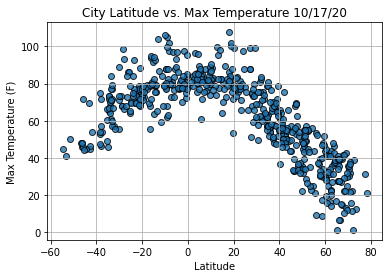

In [79]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

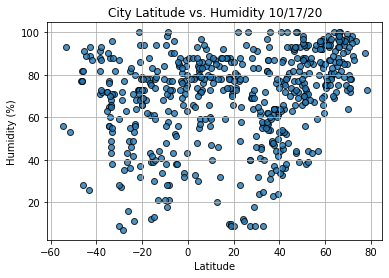

In [80]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

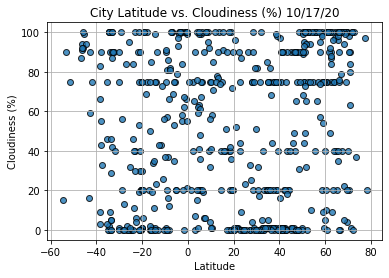

In [81]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

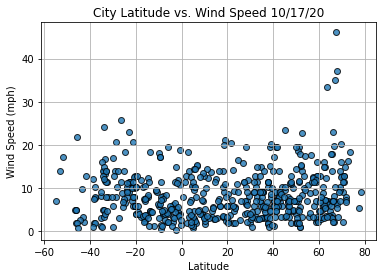

In [82]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [ ]:
def plot_linear_regression(x_values, y_values,
                       """Linear Regression on the Northern Hemisphere \n
                           for Maximum Temperature""", 'Max Temp',(10,40)

In [108]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [109]:
index13 =city_data_df.loc[13]
index13

City                      Mikkeli
Lat                         61.69
Lng                         27.27
Max Temp                    42.01
Humidity                       93
Cloudiness                    100
Wind Speed                   5.99
Country                        FI
Date          2020-10-17 14:51:23
Name: 13, dtype: object

In [110]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3      False
4       True
       ...  
552     True
553    False
554     True
555     True
556    False
Name: Lat, Length: 557, dtype: bool

In [111]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
4,Gayeri,12.65,0.49,99.82,20,78,13.71,BF,2020-10-17 14:51:21
7,Kapaa,22.08,-159.32,75.20,100,1,7.36,US,2020-10-17 14:51:22
10,Khasan,42.43,130.64,52.05,72,0,8.37,RU,2020-10-17 14:51:22
11,Lata,40.16,-8.33,66.00,77,97,5.99,PT,2020-10-17 14:51:23
12,Fort Nelson,58.81,-122.70,8.60,92,20,2.24,CA,2020-10-17 14:51:23
...,...,...,...,...,...,...,...,...,...
548,Kumluca,36.37,30.29,76.75,59,68,5.73,TR,2020-10-17 14:52:50
551,Havre-Saint-Pierre,50.23,-63.60,48.20,87,90,19.46,CA,2020-10-17 14:52:51
552,Naze,28.37,129.48,77.00,83,90,19.46,JP,2020-10-17 14:52:51
554,Igrim,63.19,64.42,31.32,89,96,12.35,RU,2020-10-17 14:52:51


In [112]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

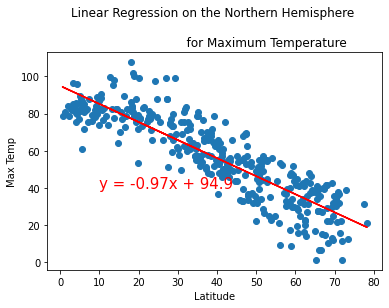

In [113]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       """Linear Regression on the Northern Hemisphere \n
                           for Maximum Temperature""", 'Max Temp',(10,40))

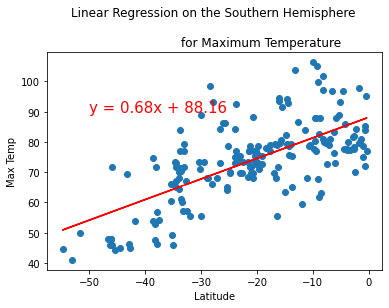

In [114]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       """Linear Regression on the Southern Hemisphere \n
                        for Maximum Temperature""", 'Max Temp',(-50,90))

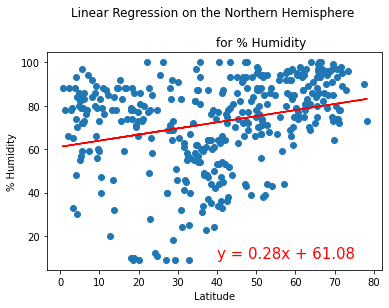

In [115]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       """Linear Regression on the Northern Hemisphere \n
                        for % Humidity""", "% Humidity",(40,10))

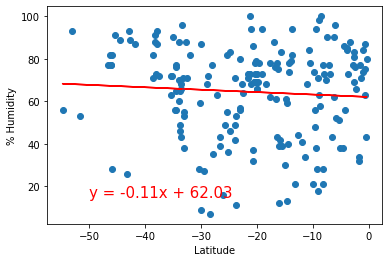

In [99]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       """Linear Regression on the Southern Hemisphere \n
                        for % Humidity""", "% Humidity",(-50,15))

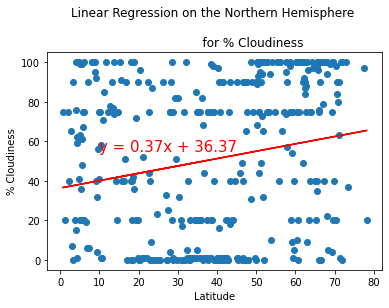

In [118]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   """Linear Regression on the Northern Hemisphere \n
                    for % Cloudiness""", '% Cloudiness',(10,55))

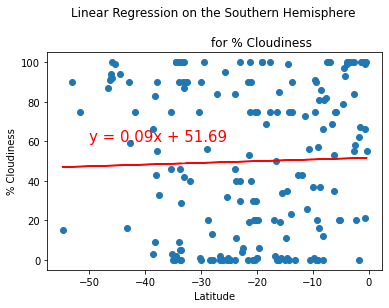

In [120]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       """Linear Regression on the Southern Hemisphere \n
                        for % Cloudiness""", '% Cloudiness',(-50,60))

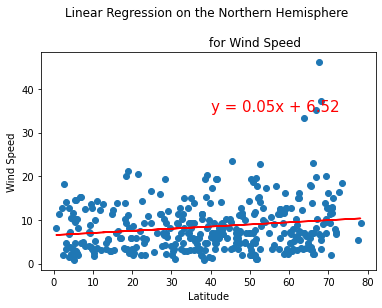

In [122]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       """Linear Regression on the Northern Hemisphere \n
                        for Wind Speed""", 'Wind Speed',(40,35))

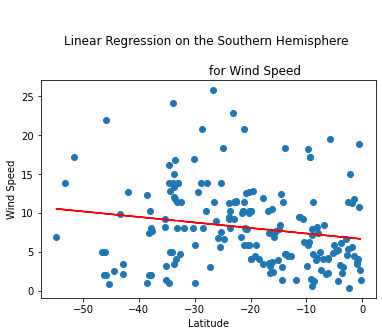

In [124]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       """Linear Regression on the Southern Hemisphere \n
                        for Wind Speed""", 'Wind Speed',(-50,35))